In [365]:
import numpy as np
import inspect
import matplotlib.pyplot as plt

class Perceptron:
    '''
    Simple perceptron class
    '''
    def __init__(self, n_iter = 10, lr = 0.01):
        '''
        Define constant parameters
        param n_iter: n iterations
        param lr: learning rate
        '''
        self.lr = 0.1
        self.n_iter = n_iter
        self.errors = []
        self.fit_called = False
    
    def fit(self, X, y):
        '''
        Fitting model.
        param X: feature array
        param y: labels
        '''
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.random.randn(X_bias.shape[1])
        self.fit_called = True
        for i in range(self.n_iter):
            z = np.where(X_bias.dot(self.w) > 0, 1, -1)
            self.w += self.lr * (y - z).dot(X_bias) 
            self.errors.append(np.sum(y!=z))
    
    def decision(self, X):
        '''
        Return decision values
        '''
        assert self.fit_called, 'Call "Fit" before this'
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_bias.dot(self.w)
    
    def predict(self, X):
        '''
        Return 1 or -1 depends on decision value
        1 => decision > 0
        -1 => decision < 0
        '''
        return np.where(self.decision(X) > 0, 1, -1)

In [371]:
from sklearn.datasets import make_blobs
X, y = make_blobs(cluster_std=1.3)
y[y==2] = 1

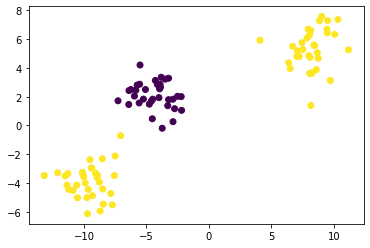

In [372]:
plt.scatter(X[:,0], X[:,1], c=y)

In [373]:
MCP = Perceptron(1000, 0.07)

In [374]:
MCP.fit(X, y)

In [375]:
MCP.predict(np.array([[-6, -10]]))

array([1])

In [378]:
def mesh_grid_visual(X, y):
    x0 = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100)
    x1 = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100)
    a,b = np.meshgrid(x0, x1)
    X_new = np.c_[a.ravel(), b.ravel()]
    predictions = MCP.predict(X_new)
    decision = MCP.decision(X_new)
    plt.contourf(x0, x1, predictions.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.4)
    plt.contourf(x0, x1, decision.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.2)
    plt.scatter(X[:,0], X[:, 1], c = y)
    plt.show()

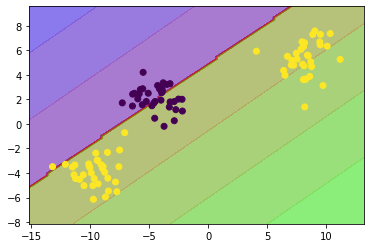

In [379]:
mesh_grid_visual(X, y)